In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Flight_Booking.csv")

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
# LABEL ENCODING: # one hot encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time']  = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [ ]:
columns_to_code = ['duration', 'days_left', 'price']
for column in columns_to_code:
  df[column] = le.fit_transform(df[column])
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  int64 
 1   flight            300153 non-null  object
 2   source_city       300153 non-null  int64 
 3   departure_time    300153 non-null  int64 
 4   stops             300153 non-null  int64 
 5   arrival_time      300153 non-null  int64 
 6   destination_city  300153 non-null  int64 
 7   class             300153 non-null  int64 
 8   duration          300153 non-null  int64 
 9   days_left         300153 non-null  int64 
 10  price             300153 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 25.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline         

<ipython-input-11-acffe65b9a92>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap  = "Blues")


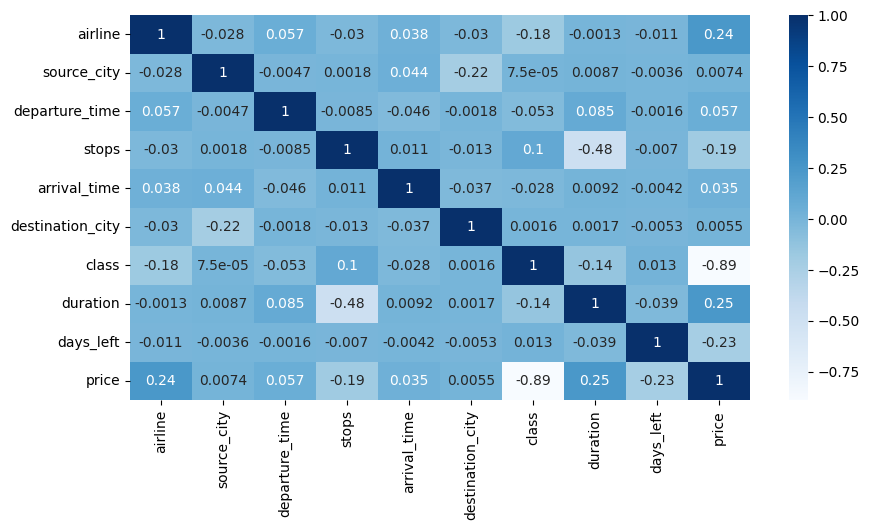

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap  = "Blues")
plt.show()

In [ ]:
df.drop('flight', axis = 1, inplace = True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,16,0,2289
1,4,2,1,2,4,5,1,18,0,2289
2,0,2,1,2,1,5,1,16,0,2292
3,5,2,4,2,0,5,1,17,0,2291
4,5,2,4,2,4,5,1,18,0,2291


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

In [ ]:
X =  df[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,airline,3.376737
1,source_city,2.914358
2,departure_time,2.771473
3,stops,1.436293
4,arrival_time,3.669504
5,destination_city,2.870019
6,class,2.838291
7,duration,3.812975
8,days_left,3.772279


In [ ]:
df = df.drop(columns = ['source_city'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)
X =  df[col_list]
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_data

,Features,VIF
0,airline,3.324603
1,departure_time,2.747495
2,stops,1.420837
3,arrival_time,3.549539
4,destination_city,2.842443
5,class,2.761647
6,duration,3.674720
7,days_left,3.685202


In [ ]:
## import pandas as pd

# Assuming df is your DataFrame
# Loop through columns and check if the data type is object (usually indicates strings)
#for column in df.columns:
  #  if df[column].dtype == 'object':
  #      print(f"Column '{column}' contains string values.")


In [ ]:
# linear regression
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Value', 'Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,3447.0,1887.331200
1,11033.0,9665.351426
2,2491.0,2089.935342
3,10814.0,11644.108900
4,2814.0,2712.688647
...,...,...
60026,1533.0,2418.108957
60027,255.0,1420.883010
60028,2938.0,2364.012081
60029,1577.0,626.165301


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8647381821071755

In [ ]:
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1175.1790029740457

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

6321256405546421.0

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

2282521.075745248

In [ ]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

1510.8014680113492

<ipython-input-30-ff10c946bceb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual")
<ipython-input-30-ff10c946bceb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Predicted')


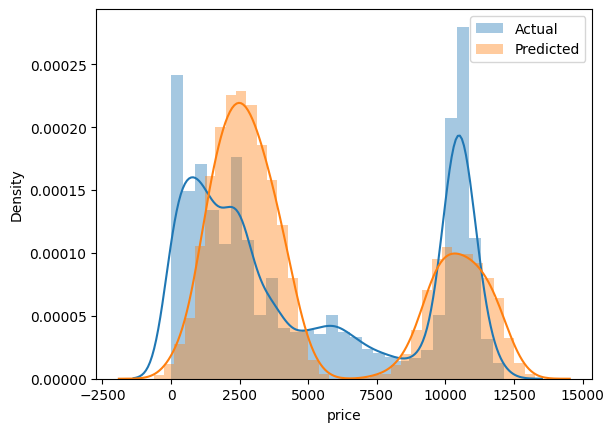

In [ ]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = 'Predicted')
plt.legend()

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9499573724323571

In [ ]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

410.38128494722173

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

1119204261813508.9

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

844461.163455016

In [ ]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

918.945680361476

<ipython-input-50-aa72c6bed542>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual")
<ipython-input-50-aa72c6bed542>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted")


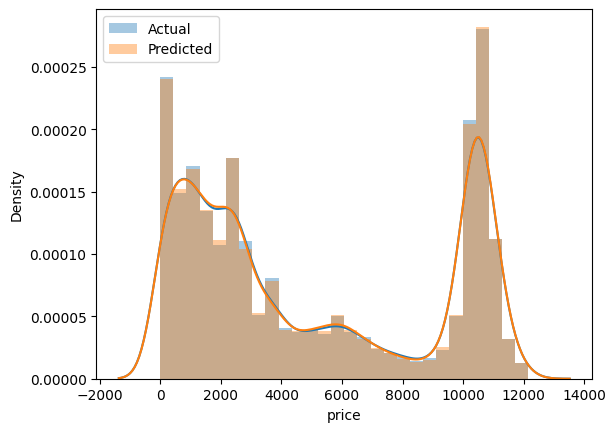

In [ ]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()

In [ ]:
# RAndom Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.9685177447836566

In [ ]:
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

371.51944251330536

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

1133744146594620.0

In [ ]:
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

531257.9127114237

In [ ]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

728.8744149107058

<ipython-input-61-aa72c6bed542>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual")
<ipython-input-61-aa72c6bed542>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted")


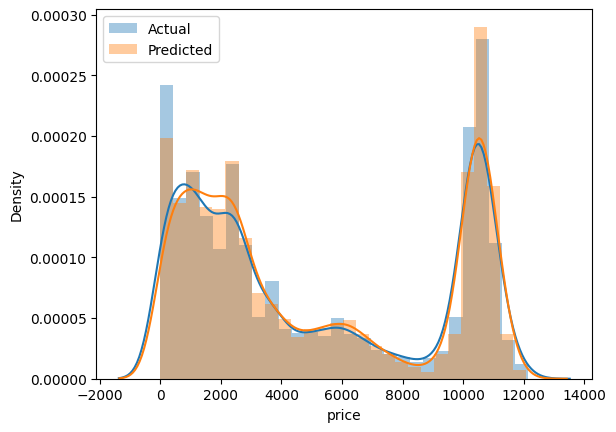

In [ ]:
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()